# Data Analysis

### Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load prepared data from CSV

In [3]:
df = pd.read_csv("../data/ab_cleaned_data.csv", index_col=0)
analysis_df = pd.read_csv("../data/ab_analysis_data.csv", index_col=0)

df["install_date"] = pd.to_datetime(df["install_date"])

df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15285 entries, 0 to 15284
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            15285 non-null  object        
 1   install_date       15285 non-null  datetime64[ns]
 2   country            15285 non-null  object        
 3   test_group         15285 non-null  object        
 4   trial              15285 non-null  int64         
 5   paid               15285 non-null  int64         
 6   subscription_name  1723 non-null   object        
 7   revenue_1m         15285 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.0+ MB


## CR Conversion Rate calculating

In [274]:
cr_df = analysis_df.copy()

cr_df

,test_group,total_visitors,conversions,trial_starters
0,control,7627,116,925
1,treatment,7658,149,798


In [275]:
# Conversion Rate from a Visitor to Paid
# Conversion Rate CR = (Total Conversions / Total Visitors) * 100%

cr_df["visitor_to_paid_conversion_rate"] = (
    cr_df["conversions"] / cr_df["total_visitors"]
) * 100

# Conversion Rate from a Tial to Paid
cr_df["trial_to_paid_conversion_rate"] = (
    cr_df["conversions"] / cr_df["trial_starters"]
) * 100

# Conversion Rate from a Visitor to Trial (Trial Signup Conversion Rate)
cr_df["visitor_to_trial_conversion_rate"] = (
    cr_df["trial_starters"] / cr_df["total_visitors"]
) * 100

cr_df

,test_group,total_visitors,conversions,trial_starters,visitor_to_paid_conversion_rate,trial_to_paid_conversion_rate,visitor_to_trial_conversion_rate
0,control,7627,116,925,1.520913,12.540541,12.127966
1,treatment,7658,149,798,1.945678,18.671679,10.420475


### Save CR calculation results as a CSV file

In [276]:
cr_df.to_csv("../data/ab_conversion_rate_data.csv")

## Revenue calculating

In [277]:
df_control = df[df["test_group"] == "control"]

df_control.describe()

,install_date,trial,paid,revenue_1m
count,7627,7627.000000,7627.000000,7627.000000
mean,2023-06-04 01:45:09.794152448,0.121280,0.015209,0.091103
min,2023-06-01 00:00:00,0.000000,0.000000,0.000000
25%,2023-06-02 00:00:00,0.000000,0.000000,0.000000
50%,2023-06-04 00:00:00,0.000000,0.000000,0.000000
75%,2023-06-06 00:00:00,0.000000,0.000000,0.000000
max,2023-06-07 00:00:00,1.000000,1.000000,5.990000
std,NaN,0.326473,0.122392,0.733127


In [278]:
df_treatment = df[df["test_group"] == "treatment"]

df_treatment.describe()

,install_date,trial,paid,revenue_1m
count,7658,7658.000000,7658.000000,7658.000000
mean,2023-06-04 00:17:17.973361408,0.104205,0.019457,0.103467
min,2023-06-01 00:00:00,0.000000,0.000000,0.000000
25%,2023-06-02 00:00:00,0.000000,0.000000,0.000000
50%,2023-06-04 00:00:00,0.000000,0.000000,0.000000
75%,2023-06-06 00:00:00,0.000000,0.000000,0.000000
max,2023-06-07 00:00:00,1.000000,1.000000,11.960000
std,NaN,0.305546,0.138133,0.828453


In [279]:
df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0


In [280]:
revenue_df = analysis_df.copy()

revenue_df

,test_group,total_visitors,conversions,trial_starters
0,control,7627,116,925
1,treatment,7658,149,798


### Calculate Total Revenue by Groups

In [281]:
total_revenue_by_group = df.groupby("test_group")["revenue_1m"].sum()

revenue_df = revenue_df.merge(
    total_revenue_by_group.reset_index(name="total_revenue"),
    on="test_group",
    how="left",
)

revenue_df

,test_group,total_visitors,conversions,trial_starters,total_revenue
0,control,7627,116,925,694.84
1,treatment,7658,149,798,792.35


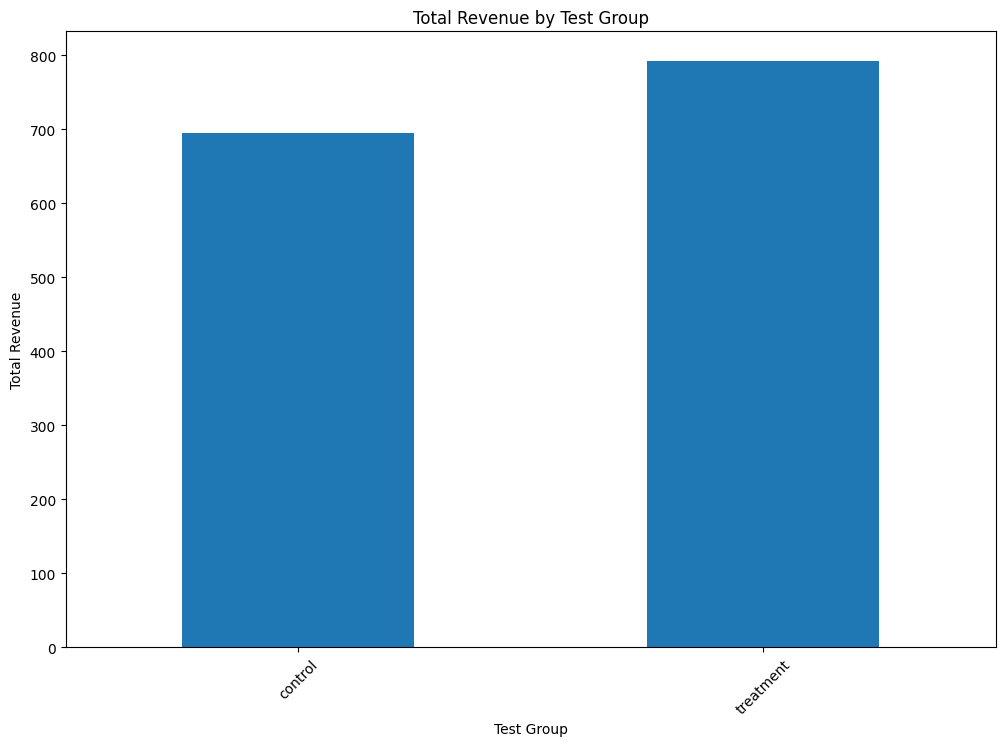

In [282]:
plt.figure(figsize=(12, 8))
total_revenue_by_group.plot(kind="bar")
plt.title("Total Revenue by Test Group")
plt.xlabel("Test Group")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

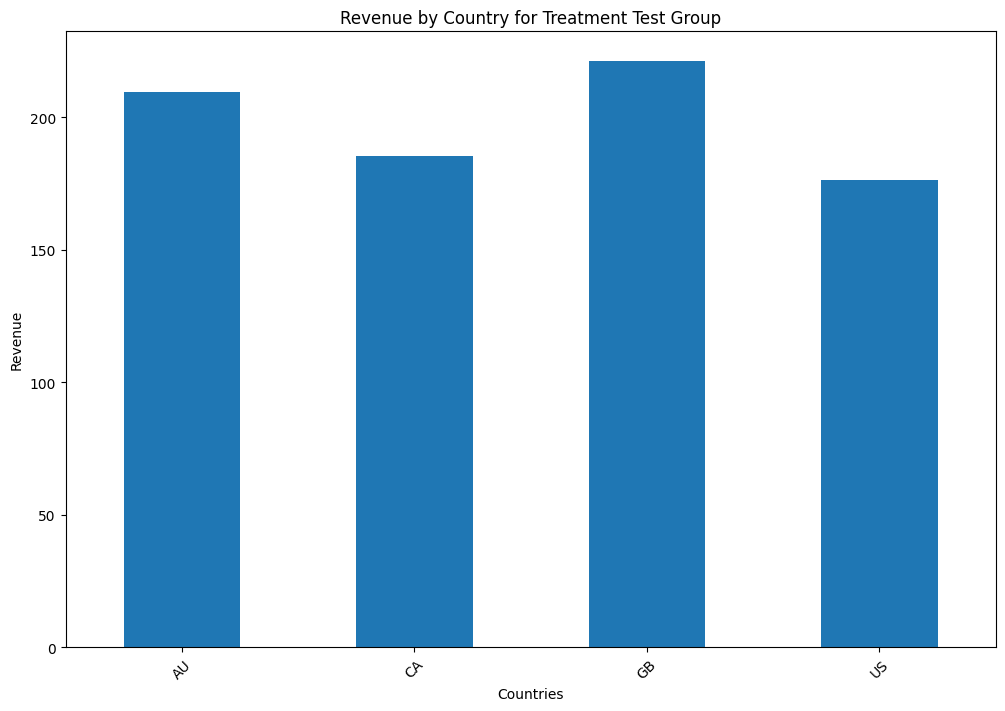

In [283]:
revenue_by_country_treatment = df_treatment.groupby("country")["revenue_1m"].sum()

plt.figure(figsize=(12, 8))
revenue_by_country_treatment.plot(kind="bar")
plt.title("Revenue by Country for Treatment Test Group")
plt.xlabel("Countries")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

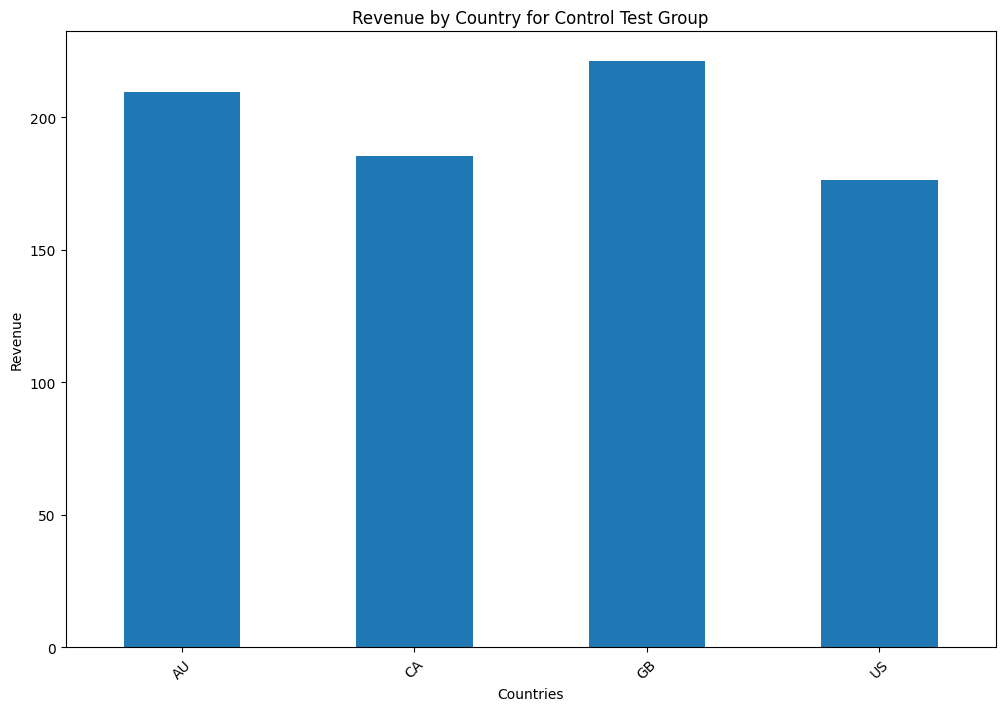

In [284]:
revenue_by_country_control = df_control.groupby("country")["revenue_1m"].sum()

plt.figure(figsize=(12, 8))
revenue_by_country_treatment.plot(kind="bar")
plt.title("Revenue by Country for Control Test Group")
plt.xlabel("Countries")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [285]:
df_control.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
6,000eb23cf1caf152d9b8d4ec2441e085,2023-06-02,AU,control,0,0,NaN,0.0
9,002066ee39aacf3dbe4294be1a08bd77,2023-06-06,GB,control,0,0,NaN,0.0
14,00325ed2425735d08aa2ab3a7347166f,2023-06-06,CA,control,0,0,NaN,0.0
15,0032f6e3d890cc6956761fbb511c57ec,2023-06-06,US,control,0,0,NaN,0.0


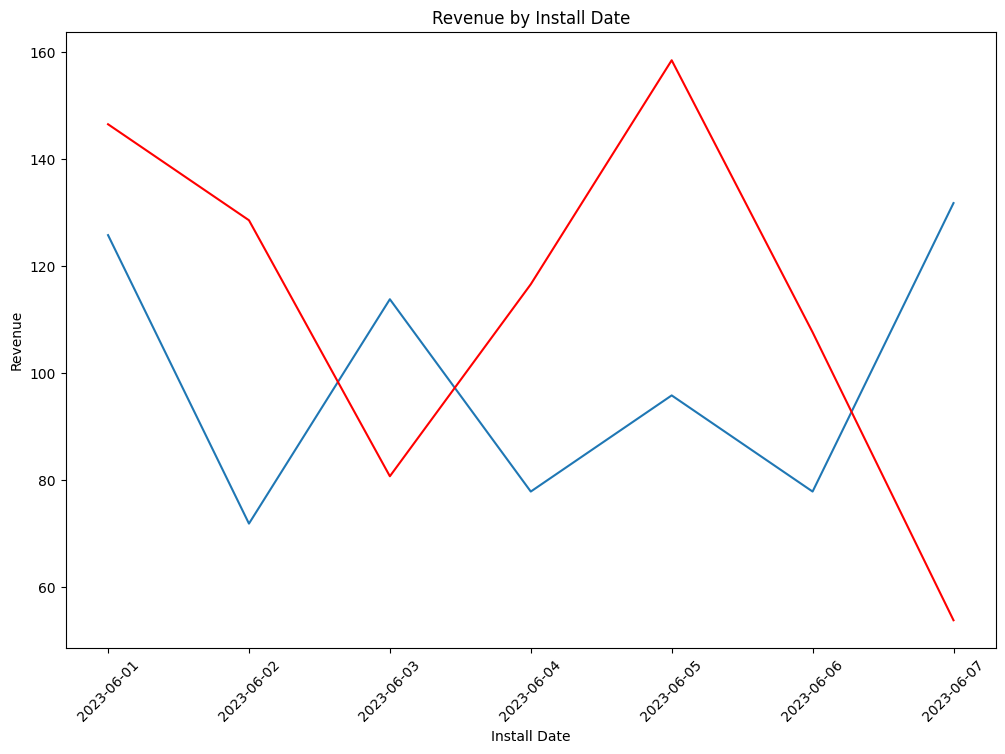

In [286]:
plt.figure(figsize=(12, 8))
plt.plot(df_control.groupby("install_date")["revenue_1m"].sum())
plt.plot(df_treatment.groupby("install_date")["revenue_1m"].sum(), c="r")
plt.title("Revenue by Install Date")
plt.xlabel("Install Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

### Calculate Average Revenue Per User (ARPU)

In [287]:
revenue_df["average_revenue_per_user"] = (
    revenue_df["total_revenue"] / revenue_df["total_visitors"]
)

revenue_df

,test_group,total_visitors,conversions,trial_starters,total_revenue,average_revenue_per_user
0,control,7627,116,925,694.84,0.091103
1,treatment,7658,149,798,792.35,0.103467


### Calculate Average Revenue Per Paying User (ARPPU)

In [288]:
revenue_df["average_revenue_per_paying_user"] = (
    revenue_df["total_revenue"] / revenue_df["conversions"]
)

revenue_df

,test_group,total_visitors,conversions,trial_starters,total_revenue,average_revenue_per_user,average_revenue_per_paying_user
0,control,7627,116,925,694.84,0.091103,5.990000
1,treatment,7658,149,798,792.35,0.103467,5.317785


### Save Revenue Metrics calculation results as a CSV file

In [289]:
revenue_df.to_csv("../data/ab_revenue_metrics_data.csv")